In [1]:
import pandas as pd
import numpy as np
import shap

In [2]:
df = pd.read_csv('for_ml_model.csv')

In [3]:
df

,appid,Game,review,voted_up,release_date,english,developer,publisher,achievements,recommended,...,tw_Unnamed: 0,tw_Rank,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,tw_Avg_viewers,tw_Avg_channels,tw_Avg_viewer_ratio
0,20,team fortress classic,28.0,0.785714,1999-04-01,1,Valve,Valve,0,0,...,384991,5556,11940,3960,11,2,9,0,0,3.02
1,20,team fortress classic,28.0,0.678571,1999-04-01,1,Valve,Valve,0,0,...,277517,5741,8340,4260,10,2,17,0,0,1.96
2,20,team fortress classic,19.0,0.789474,1999-04-01,1,Valve,Valve,0,0,...,671313,4907,8700,4260,17,2,16,0,0,2.04
3,20,team fortress classic,18.0,0.611111,1999-04-01,1,Valve,Valve,0,0,...,2271,2972,12900,6480,70,2,13,0,0,1.99
4,20,team fortress classic,26.0,0.846154,1999-04-01,1,Valve,Valve,0,0,...,758661,3796,13500,3420,36,2,9,0,0,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38015,313120,stranded deep,295.0,0.756757,2015-01-23,1,Beam Team Games,Beam Team Pty Ltd,8,1,...,468740,362,30863160,2123460,24871,142,6335,692,47,14.53
38016,313120,stranded deep,187.0,0.802139,2015-01-23,1,Beam Team Games,Beam Team Pty Ltd,8,1,...,360056,2721,4200600,943920,742,66,2729,104,23,4.45
38017,738060,freddy fazbears pizzeria simulator,1.0,1.000000,2017-12-04,1,Scott Cawthon,Scott Cawthon,0,1,...,915026,1562,688020,79560,1699,15,603,15,1,8.65
38018,738060,freddy fazbears pizzeria simulator,1.0,1.000000,2017-12-04,1,Scott Cawthon,Scott Cawthon,0,1,...,253956,4080,255420,69960,230,10,500,5,1,3.65


In [4]:
# define the target here
# change this would change the target of the model, e.g., tw_Avg_viewer_ratio, tw_Hours_Streamed, etc.
target_unlagged = 'tw_Hours_Streamed'

In [5]:
target = target_unlagged + 'lagged'

In [6]:
list(df.columns)

['appid',
 'Game',
 'review',
 'voted_up',
 'release_date',
 'english',
 'developer',
 'publisher',
 'achievements',
 'recommended',
 '2d',
 'action',
 'adventure',
 'atmospheric',
 'casual',
 'co_op',
 'difficult',
 'fps',
 'first_person',
 'funny',
 'great_soundtrack',
 'indie',
 'multiplayer',
 'open_world',
 'rpg',
 'sandbox',
 'sci_fi',
 'shooter',
 'simulation',
 'singleplayer',
 'story_rich',
 'strategy',
 'survival',
 'third_person',
 'year',
 'month',
 'gamename',
 'avg',
 'gain',
 'peak',
 'avg_peak_perc',
 'windows',
 'mac',
 'linux',
 'tw_Unnamed: 0',
 'tw_Rank',
 'tw_Hours_watched',
 'tw_Hours_Streamed',
 'tw_Peak_viewers',
 'tw_Peak_channels',
 'tw_Streamers',
 'tw_Avg_viewers',
 'tw_Avg_channels',
 'tw_Avg_viewer_ratio']

In [7]:
df.drop(['tw_Unnamed: 0'], axis=1, inplace=True)

In [8]:
df[target] = df.groupby(['appid'])[target_unlagged].shift(-1)

In [9]:
df[['appid','year','month',target_unlagged,target]]

,appid,year,month,tw_Hours_Streamed,tw_Hours_Streamedlagged
0,20,2016,January,3960,4260.0
1,20,2016,February,4260,4260.0
2,20,2016,March,4260,6480.0
3,20,2016,April,6480,3420.0
4,20,2016,May,3420,2220.0
...,...,...,...,...,...
38015,313120,2021,January,2123460,943920.0
38016,313120,2021,February,943920,NaN
38017,738060,2020,November,79560,69960.0
38018,738060,2020,December,69960,90300.0


In [10]:
df['big_publisher'] = df.groupby('publisher')['appid'].transform('nunique')

In [11]:
df['big_publisher'] = df['big_publisher'].apply(lambda x : 1 if x >3 else 0)

In [12]:
genre = [ '2d',
 'action',
 'adventure',
 'atmospheric',
 'casual',
 'co_op',
 'difficult',
 'fps',
 'first_person',
 'funny',
 'great_soundtrack',
 'indie',
 'multiplayer',
 'open_world',
 'rpg',
 'sandbox',
 'sci_fi',
 'shooter',
 'simulation',
 'singleplayer',
 'story_rich',
 'strategy',
 'survival',
 'third_person']
basics = ['review','voted_up','recommended','achievements','avg','gain','mac','linux','big_publisher','tw_Avg_viewer_ratio', 'tw_Hours_watched',
 'tw_Hours_Streamed',
 'tw_Peak_viewers',
 'tw_Peak_channels',
 'tw_Streamers',
 'tw_Avg_viewers',
 'tw_Avg_channels']
variables = genre + basics + [target]

In [13]:
df_ml = df[variables].dropna()

In [14]:
for i in genre:
    df_ml[i] = df_ml[i].apply(lambda x : 1 if x>0 else 0)

In [15]:
zerotoone = genre + ['voted_up','recommended','mac','linux','big_publisher']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
import pandas as pd
import tensorflow as tf


In [17]:
df_ml

,2d,action,adventure,atmospheric,casual,co_op,difficult,fps,first_person,funny,...,big_publisher,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,tw_Avg_viewers,tw_Avg_channels,tw_Hours_Streamedlagged
0,0,1,1,0,0,1,0,1,1,1,...,1,3.02,11940,3960,11,2,9,0,0,4260.0
1,0,1,1,0,0,1,0,1,1,1,...,1,1.96,8340,4260,10,2,17,0,0,4260.0
2,0,1,1,0,0,1,0,1,1,1,...,1,2.04,8700,4260,17,2,16,0,0,6480.0
3,0,1,1,0,0,1,0,1,1,1,...,1,1.99,12900,6480,70,2,13,0,0,3420.0
4,0,1,1,0,0,1,0,1,1,1,...,1,3.95,13500,3420,36,2,9,0,0,2220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38013,0,1,1,1,0,1,0,0,1,0,...,0,6.32,2551860,403500,3072,25,1094,59,9,1233000.0
38014,0,1,1,1,0,1,0,0,1,0,...,0,14.63,18039840,1233000,27293,314,5466,404,27,2123460.0
38015,0,1,1,1,0,1,0,0,1,0,...,0,14.53,30863160,2123460,24871,142,6335,692,47,943920.0
38017,0,0,1,1,0,0,1,0,1,1,...,1,8.65,688020,79560,1699,15,603,15,1,69960.0


In [18]:
y=df_ml[target]

In [19]:
transform_list = [item for item in variables if item not in zerotoone + [target]]
not_transform_list = [item for item in variables if item not in transform_list + [target]]

In [20]:
whole_list = transform_list + not_transform_list + [target]

In [21]:
df_ml = df_ml[whole_list]

In [22]:
df_ml

,review,achievements,avg,gain,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,...,story_rich,strategy,survival,third_person,voted_up,recommended,mac,linux,big_publisher,tw_Hours_Streamedlagged
0,28.0,0,70.16,-2.03,3.02,11940,3960,11,2,9,...,0,0,0,0,0.785714,0,1,1,1,4260.0
1,28.0,0,69.93,-0.23,1.96,8340,4260,10,2,17,...,0,0,0,0,0.678571,0,1,1,1,4260.0
2,19.0,0,63.04,-6.89,2.04,8700,4260,17,2,16,...,0,0,0,0,0.789474,0,1,1,1,6480.0
3,18.0,0,60.49,-2.55,1.99,12900,6480,70,2,13,...,0,0,0,0,0.611111,0,1,1,1,3420.0
4,26.0,0,59.40,-1.09,3.95,13500,3420,36,2,9,...,0,0,0,0,0.846154,0,1,1,1,2220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38013,133.0,8,505.58,-12.64,6.32,2551860,403500,3072,25,1094,...,0,1,1,0,0.823529,1,1,1,0,1233000.0
38014,260.0,8,541.93,36.35,14.63,18039840,1233000,27293,314,5466,...,0,1,1,0,0.750958,1,1,1,0,2123460.0
38015,295.0,8,747.84,205.91,14.53,30863160,2123460,24871,142,6335,...,0,1,1,0,0.756757,1,1,1,0,943920.0
38017,1.0,0,114.97,9.19,8.65,688020,79560,1699,15,603,...,1,1,0,0,1.000000,1,0,0,1,69960.0


In [23]:
X=df_ml.drop(columns=[target])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
transform_list

['review',
 'achievements',
 'avg',
 'gain',
 'tw_Avg_viewer_ratio',
 'tw_Hours_watched',
 'tw_Hours_Streamed',
 'tw_Peak_viewers',
 'tw_Peak_channels',
 'tw_Streamers',
 'tw_Avg_viewers',
 'tw_Avg_channels']

In [26]:
ct = ColumnTransformer([
        ('scaler', StandardScaler(), transform_list)
    ], remainder='passthrough')



In [27]:
X_scaler = ct.fit(X_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.18704208, -0.13865842, -0.10478537, ...,  1.        ,
         0.        ,  0.        ],
       [-0.24045722, -0.37812585, -0.05961204, ...,  1.        ,
         1.        ,  0.        ],
       [-0.20160984, -0.31565609, -0.10821265, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.15651444, -0.24277469,  0.02491809, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14212479, -0.00330727, -0.08746055, ...,  0.        ,
         0.        ,  1.        ],
       [-0.24409917, -0.52388863, -0.10895863, ...,  1.        ,
         0.        ,  0.        ]])

In [30]:
rf_model = RandomForestRegressor(n_estimators=128, random_state=78)

rf_model = rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
# print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [31]:
predictions = rf_model.predict(X_test_scaled)

In [32]:
import time
import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.088 seconds


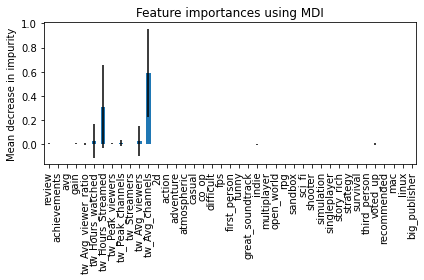

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
X_train.shape

(27930, 41)

In [35]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [36]:
X_train_scaled_df

,review,achievements,avg,gain,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,...,singleplayer,story_rich,strategy,survival,third_person,voted_up,recommended,mac,linux,big_publisher
0,-0.187042,-0.138658,-0.104785,-0.010412,-0.310621,-0.089376,-0.143136,-0.204736,-0.178832,-0.176490,...,1.0,0.0,1.0,0.0,1.0,0.795918,1.0,1.0,0.0,0.0
1,-0.240457,-0.378126,-0.059612,0.010529,-0.123873,-0.053676,-0.014975,0.334301,-0.000719,0.261975,...,0.0,0.0,1.0,1.0,0.0,1.000000,1.0,1.0,1.0,0.0
2,-0.201610,-0.315656,-0.108213,-0.008278,-0.318158,-0.089424,-0.143477,-0.203568,-0.173266,-0.171232,...,1.0,0.0,0.0,0.0,0.0,0.891892,0.0,0.0,0.0,1.0
3,-0.219820,0.517274,-0.108393,-0.013466,-0.144809,-0.089217,-0.144761,-0.198140,-0.178832,-0.181194,...,1.0,1.0,0.0,0.0,0.0,0.863636,1.0,0.0,0.0,0.0
4,-0.187042,-0.055365,-0.106989,-0.009997,-0.246348,-0.089198,-0.143430,-0.193580,-0.178832,-0.175106,...,1.0,0.0,0.0,0.0,0.0,0.918367,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27925,-0.178544,-0.055365,-0.107405,-0.006318,-0.293663,-0.089296,-0.142904,-0.163994,-0.173266,-0.177182,...,1.0,0.0,0.0,0.0,0.0,0.946429,0.0,1.0,1.0,0.0
27926,-0.205252,-0.242775,-0.101672,-0.042540,-0.263725,-0.088952,-0.141016,-0.201570,-0.173266,-0.166113,...,1.0,0.0,1.0,0.0,1.0,0.794118,1.0,0.0,0.0,0.0
27927,0.156514,-0.242775,0.024918,-0.272218,-0.259538,-0.082616,-0.092063,-0.181406,-0.100907,-0.098316,...,1.0,0.0,1.0,1.0,0.0,0.840361,1.0,0.0,0.0,0.0
27928,-0.142125,-0.003307,-0.087461,-0.004113,-0.347678,-0.089366,-0.139220,-0.202286,-0.167700,-0.155597,...,1.0,0.0,0.0,0.0,1.0,0.825581,1.0,0.0,0.0,1.0


In [37]:
X_train

,review,achievements,avg,gain,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,...,singleplayer,story_rich,strategy,survival,third_person,voted_up,recommended,mac,linux,big_publisher
24030,49.0,37,109.85,-2.74,3.33,41340,12420,25,2,56,...,1,0,1,0,1,0.795918,1,1,0,0
30620,5.0,14,1217.41,85.09,12.25,6240000,509280,14327,34,3225,...,0,0,1,1,0,1.000000,1,1,1,0
24452,37.0,20,25.82,6.21,2.97,32940,11100,56,3,94,...,1,0,0,0,0,0.891892,0,0,0,1
4479,22.0,100,21.39,-15.55,11.25,68820,6120,200,2,22,...,1,1,0,0,0,0.863636,1,0,0,0
17133,49.0,45,55.81,-1.00,6.40,72180,11280,321,2,66,...,1,0,0,0,0,0.918367,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17130,56.0,45,45.62,14.43,4.14,55200,13320,1106,3,51,...,1,0,0,0,0,0.946429,0,1,1,0
6367,34.0,27,186.18,-137.49,5.57,114960,20640,109,3,131,...,1,0,1,0,1,0.794118,1,0,0,0
11469,332.0,27,3289.92,-1100.78,5.77,1215000,210420,644,16,621,...,1,0,1,1,0,0.840361,1,0,0,0
874,86.0,50,534.62,23.68,1.56,43020,27600,90,4,207,...,1,0,0,0,1,0.825581,1,0,0,1


In [38]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_train_scaled_df.sample(n=100, random_state=1), y=y.values)

In [39]:
sp = shap_values[0]

In [40]:
sp.base_values = sp.base_values[0]

In [41]:
sp

.values =
array([-1.84510041e+03, -6.68071406e+03,  2.35844775e+04, -6.76692159e+03,
        1.21335508e+04, -2.92933457e+03,  2.26991855e+05,  1.08478916e+04,
        2.06245675e+03,  2.20068365e+04, -3.82916825e+03, -6.78661069e+04,
       -3.05268058e+02,  7.98199445e+02,  2.52622189e+03, -6.87711295e+02,
        3.39256914e+02, -5.83824134e+02, -9.66197141e+02, -5.64500205e+03,
       -5.35497720e+03, -1.16038585e+01,  4.67415289e+02, -7.39193282e+02,
        1.18184183e+03,  2.52019545e+03,  2.24864078e+03, -2.89789633e+02,
       -1.30361272e+03, -8.79110251e+02,  4.72928306e+02, -4.83381710e+02,
        1.96508131e+03,  2.13690991e+03, -2.00648425e+03, -4.91998905e+02,
       -9.12577211e+03,  8.02247708e+02,  4.48645577e+02, -2.07941430e+03,
        1.09702357e+03])

.base_values =
568456.0421086198

.data =
array([-0.11784518, -0.00330727,  0.0378286 , -0.11832067, -0.29743169,
       -0.07209245,  0.05166737, -0.18543895,  0.03824342,  0.22918372,
       -0.07251332,  0.05050

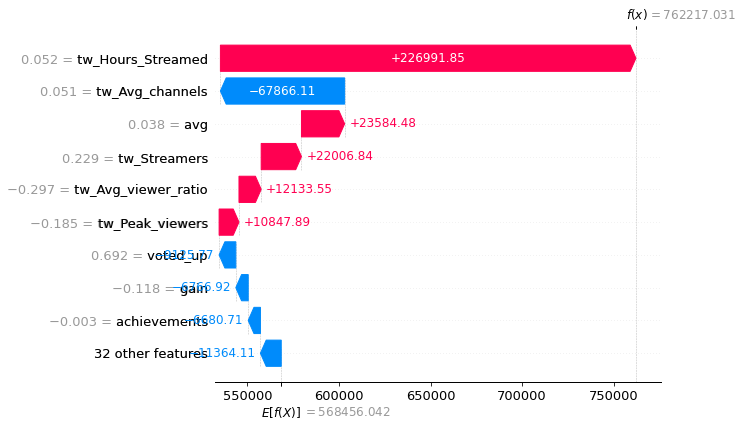

In [42]:
shap.plots.waterfall(sp)

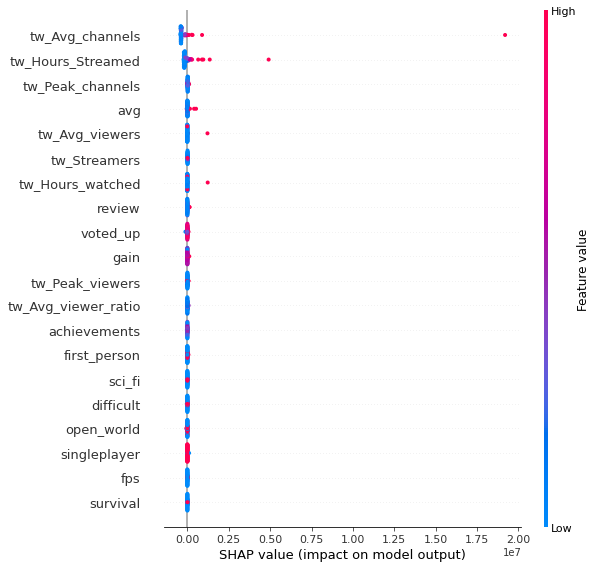

In [43]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train_scaled_df.sample(n=100, random_state=1))
# f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

# color: feature value
# x: shap value
# y: features

In [44]:
shap_values_v = shap.TreeExplainer(rf_model).shap_values(X_train_scaled_df.sample(n=100, random_state=1))

In [45]:
shap_values_v

array([[-1.84510041e+03, -6.68071406e+03,  2.35844775e+04, ...,
         4.48645577e+02, -2.07941430e+03,  1.09702357e+03],
       [-3.10374227e+03, -3.96989559e+02,  1.36598674e+04, ...,
         6.12751844e+01, -2.54385826e+02,  3.39853983e+02],
       [-2.24706538e+03, -3.64118040e+02,  2.12966705e+04, ...,
         8.62483123e+01, -2.42992287e+02,  4.41539106e+02],
       ...,
       [-4.30256354e+03,  1.61510902e+01,  1.57989793e+04, ...,
         2.31490635e+02,  1.38351598e+02,  3.86173255e+02],
       [-2.95701318e+03, -9.88872857e+02,  1.62665161e+04, ...,
         1.55221729e+01, -3.23746120e+02,  3.66997814e+02],
       [-3.63473497e+03, -1.34165929e+03, -5.16532601e+03, ...,
        -1.40144992e+02,  1.73814042e+02,  5.73749635e+02]])

In [46]:
shap_values_v.shape

(100, 41)

In [47]:
base_column_names = list(X_train_scaled_df.columns)

In [48]:
shap_column_names = ['shap_'+i for i in base_column_names]

In [49]:
shap_values_v_df = pd.DataFrame(shap_values_v, columns=shap_column_names)

In [50]:
shap_values_v_df

,shap_review,shap_achievements,shap_avg,shap_gain,shap_tw_Avg_viewer_ratio,shap_tw_Hours_watched,shap_tw_Hours_Streamed,shap_tw_Peak_viewers,shap_tw_Peak_channels,shap_tw_Streamers,...,shap_singleplayer,shap_story_rich,shap_strategy,shap_survival,shap_third_person,shap_voted_up,shap_recommended,shap_mac,shap_linux,shap_big_publisher
0,-1845.100415,-6680.714062,23584.477480,-6766.921594,12133.550837,-2929.334570,226991.854671,10847.891650,2062.456755,22006.836511,...,-483.381710,1965.081311,2136.909911,-2006.484251,-491.998905,-9125.772115,802.247708,448.645577,-2079.414297,1097.023567
1,-3103.742268,-396.989559,13659.867381,-2190.351074,590.926368,-5008.545516,-211268.966921,1717.686700,23718.987931,11246.794470,...,-436.410530,232.094100,492.816620,-525.691986,-433.778941,7337.217447,34.288224,61.275184,-254.385826,339.853983
2,-2247.065384,-364.118040,21296.670482,-3068.732935,10835.238287,-3876.085416,-213880.337173,1857.749079,19882.303691,12499.865678,...,-423.683076,-416.582085,447.367565,-492.412170,-502.292316,-1131.733824,159.123552,86.248312,-242.992287,441.539106
3,-6064.198219,530.689405,20028.723513,-1456.613498,2447.119657,-3734.032136,-159244.105469,2347.589348,21295.216039,10202.235158,...,-504.003405,-19.724379,668.986355,-633.695600,1501.964228,-2466.981534,-51.548402,12.267435,-174.925607,129.603268
4,-3504.764399,-204.946085,17108.845607,-1134.706233,3294.121739,-4016.693389,-194290.460942,3249.041088,18506.256049,10493.700234,...,-376.754126,-187.601950,490.822099,-528.286758,-435.439550,-3256.975975,-22.243635,-56.321479,-225.897878,533.885198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4938.060907,4724.245815,14311.715434,2588.798206,-3517.257561,-13581.877276,285108.695547,-594.396950,3739.025740,22711.258082,...,3755.979352,2039.210692,707.964558,4059.558133,6496.154870,-7906.997181,574.475534,121.333818,439.528802,1007.973479
96,2536.290712,12229.479204,7156.931999,15555.673725,8866.550919,-9859.133466,139787.221913,5548.842383,1669.409091,20145.506655,...,-3956.853047,-61.499184,-19.986151,-172.693509,183.178893,13839.777024,972.636427,-1260.450660,794.877339,-786.251864
97,-4302.563545,16.151090,15798.979342,-510.902313,3146.244292,-4879.857368,-201971.128026,662.922157,17997.610310,11810.660746,...,-354.712869,-405.419141,-415.088040,-518.846486,-464.303398,2425.520192,527.991132,231.490635,138.351598,386.173255
98,-2957.013181,-988.872857,16266.516115,-1324.289752,2508.621452,-4201.444990,-198805.326166,1918.610952,18759.535988,11331.142602,...,-367.701765,-475.774103,375.829313,-490.807590,-681.064177,3859.782519,555.267399,15.522173,-323.746120,366.997814


In [51]:
# preparing for shap data
base_df = X_train_scaled_df.sample(n=100, random_state=1)

In [52]:
base_df.reset_index(drop=True, inplace=True)

In [53]:
shap_df = pd.concat([base_df,shap_values_v_df], axis=1)

In [54]:
shap_df

,review,achievements,avg,gain,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,...,shap_singleplayer,shap_story_rich,shap_strategy,shap_survival,shap_third_person,shap_voted_up,shap_recommended,shap_mac,shap_linux,shap_big_publisher
0,-0.117845,-0.003307,0.037829,-0.118321,-0.297432,-0.072092,0.051667,-0.185439,0.038243,0.229184,...,-483.381710,1965.081311,2136.909911,-2006.484251,-491.998905,-9125.772115,802.247708,448.645577,-2079.414297,1097.023567
1,-0.241671,-0.523889,-0.108078,-0.011630,-0.307900,-0.089470,-0.144483,-0.202738,-0.173266,-0.178012,...,-436.410530,232.094100,492.816620,-525.691986,-433.778941,7337.217447,34.288224,61.275184,-254.385826,339.853983
2,-0.235601,-0.523889,-0.108921,-0.009761,3.895615,-0.081568,-0.144575,0.021552,-0.173266,-0.180779,...,-423.683076,-416.582085,447.367565,-492.412170,-502.292316,-1131.733824,159.123552,86.248312,-242.992287,441.539106
3,-0.235601,0.059162,-0.106872,-0.014441,-0.301200,-0.088493,-0.133076,-0.204095,-0.156568,-0.168326,...,-504.003405,-19.724379,668.986355,-633.695600,1501.964228,-2466.981534,-51.548402,12.267435,-174.925607,129.603268
4,-0.240457,-0.138658,-0.107462,-0.006938,-0.286964,-0.089285,-0.143043,-0.204736,-0.173266,-0.176213,...,-376.754126,-187.601950,490.822099,-528.286758,-435.439550,-3256.975975,-22.243635,-56.321479,-225.897878,533.885198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.507355,-0.523889,0.052001,-0.074330,0.728219,0.172748,0.075579,0.919885,0.082772,0.009329,...,3755.979352,2039.210692,707.964558,4059.558133,6496.154870,-7906.997181,574.475534,121.333818,439.528802,1007.973479
96,0.109169,0.725507,-0.014867,0.036459,-0.246767,-0.067962,0.005671,-0.149822,0.032677,0.191965,...,-3956.853047,-61.499184,-19.986151,-172.693509,183.178893,13839.777024,972.636427,-1260.450660,794.877339,-786.251864
97,-0.182186,-0.086600,-0.107054,-0.000982,0.455634,-0.087544,-0.144018,0.220516,-0.173266,-0.175245,...,-354.712869,-405.419141,-415.088040,-518.846486,-464.303398,2425.520192,527.991132,231.490635,138.351598,386.173255
98,-0.140911,-0.451007,-0.107910,-0.016897,0.975054,-0.084111,-0.142532,-0.102070,-0.162134,-0.175245,...,-367.701765,-475.774103,375.829313,-490.807590,-681.064177,3859.782519,555.267399,15.522173,-323.746120,366.997814


In [55]:
# saving shap data
shap_df.to_csv(f'shap_forest_{target}.csv')

In [56]:
X_train_scaled_df

,review,achievements,avg,gain,tw_Avg_viewer_ratio,tw_Hours_watched,tw_Hours_Streamed,tw_Peak_viewers,tw_Peak_channels,tw_Streamers,...,singleplayer,story_rich,strategy,survival,third_person,voted_up,recommended,mac,linux,big_publisher
0,-0.187042,-0.138658,-0.104785,-0.010412,-0.310621,-0.089376,-0.143136,-0.204736,-0.178832,-0.176490,...,1.0,0.0,1.0,0.0,1.0,0.795918,1.0,1.0,0.0,0.0
1,-0.240457,-0.378126,-0.059612,0.010529,-0.123873,-0.053676,-0.014975,0.334301,-0.000719,0.261975,...,0.0,0.0,1.0,1.0,0.0,1.000000,1.0,1.0,1.0,0.0
2,-0.201610,-0.315656,-0.108213,-0.008278,-0.318158,-0.089424,-0.143477,-0.203568,-0.173266,-0.171232,...,1.0,0.0,0.0,0.0,0.0,0.891892,0.0,0.0,0.0,1.0
3,-0.219820,0.517274,-0.108393,-0.013466,-0.144809,-0.089217,-0.144761,-0.198140,-0.178832,-0.181194,...,1.0,1.0,0.0,0.0,0.0,0.863636,1.0,0.0,0.0,0.0
4,-0.187042,-0.055365,-0.106989,-0.009997,-0.246348,-0.089198,-0.143430,-0.193580,-0.178832,-0.175106,...,1.0,0.0,0.0,0.0,0.0,0.918367,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27925,-0.178544,-0.055365,-0.107405,-0.006318,-0.293663,-0.089296,-0.142904,-0.163994,-0.173266,-0.177182,...,1.0,0.0,0.0,0.0,0.0,0.946429,0.0,1.0,1.0,0.0
27926,-0.205252,-0.242775,-0.101672,-0.042540,-0.263725,-0.088952,-0.141016,-0.201570,-0.173266,-0.166113,...,1.0,0.0,1.0,0.0,1.0,0.794118,1.0,0.0,0.0,0.0
27927,0.156514,-0.242775,0.024918,-0.272218,-0.259538,-0.082616,-0.092063,-0.181406,-0.100907,-0.098316,...,1.0,0.0,1.0,1.0,0.0,0.840361,1.0,0.0,0.0,0.0
27928,-0.142125,-0.003307,-0.087461,-0.004113,-0.347678,-0.089366,-0.139220,-0.202286,-0.167700,-0.155597,...,1.0,0.0,0.0,0.0,1.0,0.825581,1.0,0.0,0.0,1.0


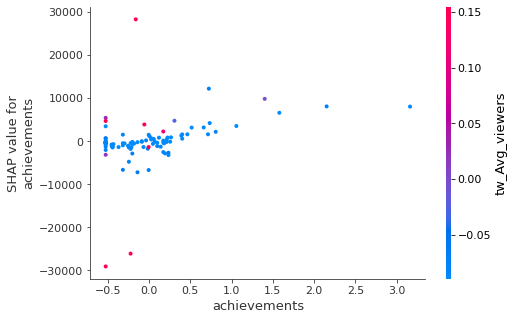

In [57]:
shap.dependence_plot('achievements', shap_values_v, X_train_scaled_df.sample(n=100, random_state=1))

In [58]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.01))
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="mse", optimizer="adam", metrics=["mse"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
873/873 [==============================] - 1s 2ms/step - loss: 15635411107840.0000 - mse: 15635411107840.0000
Epoch 2/500
873/873 [==============================] - 1s 2ms/step - loss: 15630932639744.0000 - mse: 15630932639744.0000
Epoch 3/500
873/873 [==============================] - 1s 2ms/step - loss: 15617246625792.0000 - mse: 15617246625792.0000
Epoch 4/500
873/873 [==============================] - 2s 2ms/step - loss: 15592742453248.0000 - mse: 15592742453248.0000
Epoch 5/500
873/873 [==============================] - 1s 2ms/step - loss: 15556756373504.0000 - mse: 15556756373504.0000
Epoch 6/500
873/873 [==============================] - 1s 2ms/step - loss: 15509797994496.0000 - mse: 15509797994496.0000
Epoch 7/500
873/873 [==============================] - 2s 2ms/step - loss: 15451746729984.0000 - mse: 15451746729984.0000
Epoch 8/500
873/873 [==============================] - 1s 2ms/step - loss: 15380891303936.0000 - mse: 15380891303936.0000
Epoch 9/500
873/873 [===

In [59]:
predictions = nn.predict(X_test_scaled)

In [60]:
predictions

array([[ 68209.375],
       [ 86582.   ],
       [     0.   ],
       ...,
       [     0.   ],
       [ 24830.193],
       [588699.3  ]], dtype=float32)

In [61]:
explainer_nn = shap.KernelExplainer(nn, X_train_scaled_df.sample(n=100, random_state=1))
shap_values_nn = explainer_nn.shap_values(X_train_scaled_df.sample(n=100, random_state=1))

100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


In [62]:
shap_values_nn

[array([[  3169.2369121 ,      0.        ,   9232.32839954, ...,
           3973.71750116, -24416.50157139, -64491.1875    ],
        [     0.        ,      0.        ,  -7142.45610882, ...,
              0.        , -13716.21995809, -23836.        ],
        [     0.        ,      0.        ,  -6017.26516775, ...,
              0.        ,  -5455.28125   ,      0.        ],
        ...,
        [     0.        ,      0.        ,  -5521.99189677, ...,
              0.        ,  10107.73931982,  10679.75      ],
        [     0.        ,      0.        ,  -4170.22443923, ...,
              0.        ,  -5491.4375    ,      0.        ],
        [  2810.88107153,      0.        ,  -8787.15411967, ...,
              0.        ,  15686.15996337,  19809.84375   ]])]

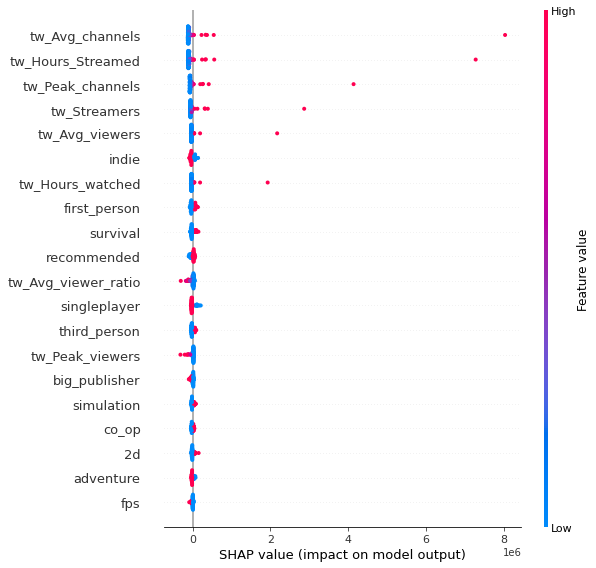

In [63]:
shap.summary_plot(shap_values_nn[0], X_train_scaled_df.sample(n=100, random_state=1))

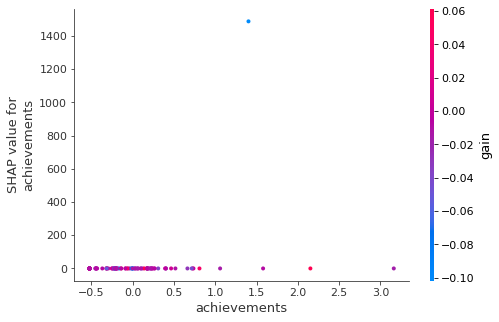

In [64]:
shap.dependence_plot('achievements', shap_values_nn[0], X_train_scaled_df.sample(n=100, random_state=1))

In [66]:
shap_values_nn_df = pd.DataFrame(shap_values_nn[0], columns=shap_column_names)

In [67]:
shap_nn_df = pd.concat([base_df,shap_values_v_df], axis=1)

In [68]:
shap_nn_df.to_csv(f'shap_nn_{target}.csv')